In [2]:
# pip install torch matplotlib

In [6]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
# Generate dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)


In [19]:
class SimpleMLP:
    def __init__(self, input_size, hidden_size, output_size):
      
        self.W1 = torch.randn(input_size, hidden_size, requires_grad=True)
        self.b1 = torch.randn(1, hidden_size, requires_grad=True)
        self.W2 = torch.randn(hidden_size, output_size, requires_grad=True)
        self.b2 = torch.randn(1, output_size, requires_grad=True)
    def forward(self, X):
        self.z1 = torch.matmul(X, self.W1) + self.b1
        self.a1 = torch.sigmoid(self.z1)  # Hidden layer activation
        self.z2 = torch.matmul(self.a1, self.W2) + self.b2
        self.a2 = torch.sigmoid(self.z2)  # Output layer activation
        return self.a2
    def backward(self,X,y,output,lr=0.01):
        m=X.shape[0]
        dz2=output-y
        dW2=torch.matmul(self.a1.T,dz2)
        db2=torch.sum(dz2,axis=0)/m

        da1=torch.matmul(dz2,self.W2.T)
        dz1=da1*(self.a1*(1-self.a1))
        dw1=torch.matmul(X.T,dz1)/m
        db1 = torch.sum(dz1, axis=0) / m
        
        with torch.no_grad():
            self.W1 -= lr * dw1
            self.b1 -= lr * db1
            self.W2 -= lr * dW2
            self.b2 -= lr * db2
    def train(self,X,y,epochs=1000,lr=0.01):
        losses=[]
        for epoch in range(epochs):
            output=self.forward(X)
            loss=torch.mean((output-y)**2)
            losses.append(loss.item())
    
            self.backward(X,y,output,lr)
            if (epoch + 1) % 100 == 0:
                print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")
        return losses

        

In [20]:
input_size = 2
hidden_size = 4
output_size = 1
model = SimpleMLP(input_size, hidden_size, output_size)

# Train the model and store the losses
losses = model.train(X_train, y_train, epochs=1000, lr=0.1)


Epoch [100/1000], Loss: 0.1005
Epoch [200/1000], Loss: 0.1183
Epoch [300/1000], Loss: 0.1173
Epoch [400/1000], Loss: 0.1069
Epoch [500/1000], Loss: 0.1152
Epoch [600/1000], Loss: 0.1374
Epoch [700/1000], Loss: 0.0992
Epoch [800/1000], Loss: 0.0989
Epoch [900/1000], Loss: 0.0957
Epoch [1000/1000], Loss: 0.0933


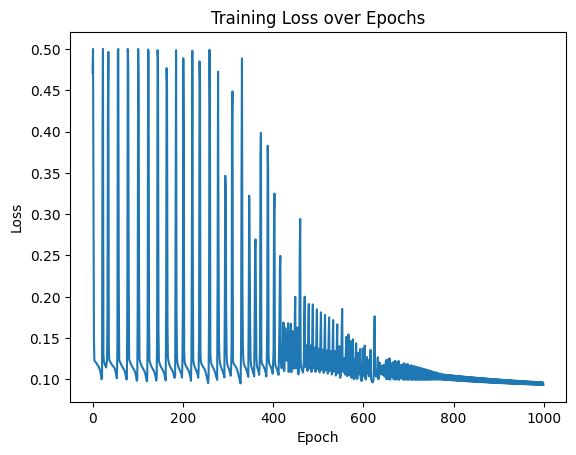

In [21]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.show()

In [22]:
with torch.no_grad():
    test_output = model.forward(X_test)
    test_output = (test_output > 0.5).float()  # Convert probabilities to binary predictions

# Calculate accuracy
accuracy = torch.mean((test_output == y_test).float())
print(f"Test Accuracy: {accuracy.item() * 100:.2f}%")

Test Accuracy: 87.00%
